In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('train.csv')

In [87]:
df.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [88]:
mapping = {'high_bike_demand': 1, 'low_bike_demand': 0}
df['increase_stock'] = df['increase_stock'].map(mapping)

In [89]:
print(df['increase_stock'].unique())

[0 1]


In [90]:
bins = [0, 6, 12, 18, 24]
labels = ['0-6', '6-12', '12-18', '18-24']
df['hour_bin'] = pd.cut(df['hour_of_day'], bins=bins, labels=labels, right=False, include_lowest=True)

print(df[['hour_of_day', 'hour_bin']].head())

   hour_of_day hour_bin
0            5      0-6
1           21    18-24
2           21    18-24
3            1      0-6
4           17    12-18


In [91]:
# Define font sizes
TITLE_SIZE = 28
LABEL_SIZE = 22
TICK_SIZE = 18

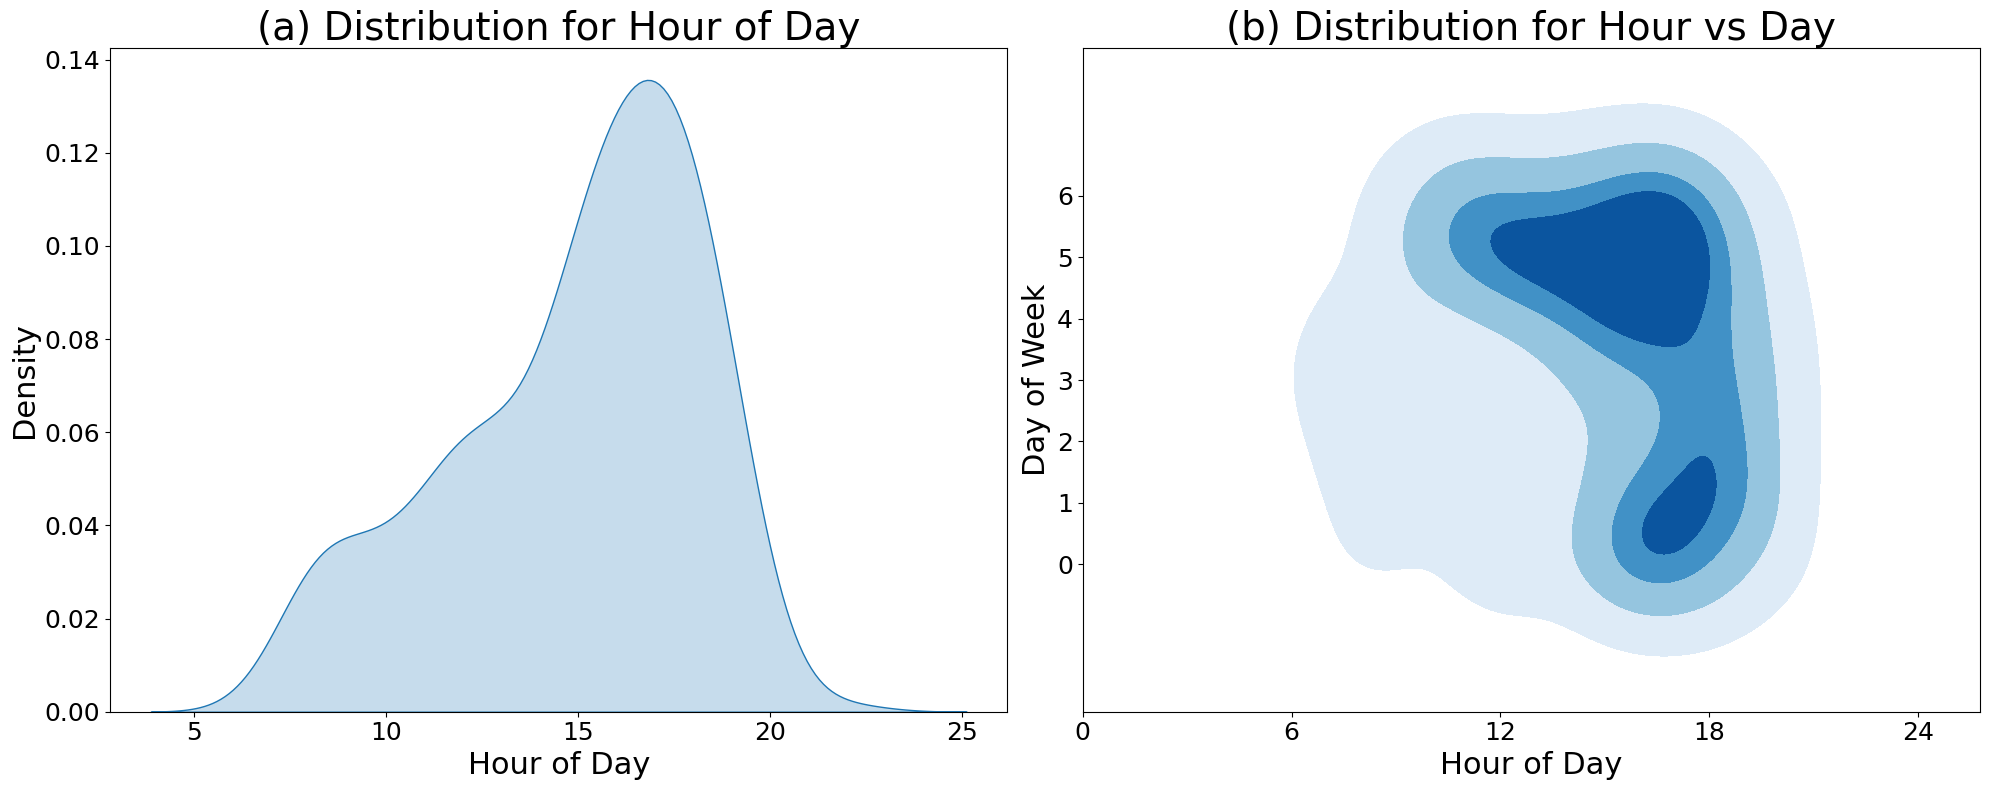

In [92]:
# Trend with hour of day
df_high = df[df['increase_stock'] == 1]
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.kdeplot(data=df_high, x="hour_of_day", fill=True, ax=axes[0])
axes[0].set_title('(a) Distribution for Hour of Day', fontsize=TITLE_SIZE)
axes[0].set_xlabel('Hour of Day', fontsize=LABEL_SIZE)
axes[0].set_ylabel('Density', fontsize=LABEL_SIZE)
axes[0].tick_params(axis='both', which='major', labelsize=TICK_SIZE)

sns.kdeplot(data=df_high, x='hour_of_day', y='day_of_week', cmap='Blues', levels=5, fill=True, ax=axes[1])
axes[1].set_title('(b) Distribution for Hour vs Day', fontsize=TITLE_SIZE)
axes[1].set_ylabel('Day of Week', fontsize=LABEL_SIZE)
axes[1].set_xlabel('Hour of Day', fontsize=LABEL_SIZE)
axes[1].set_xticks([0, 6, 12, 18, 24])
axes[1].set_yticks([0, 1, 2, 3, 4, 5, 6])
axes[1].tick_params(axis='both', which='major', labelsize=TICK_SIZE)

plt.tight_layout()
plt.savefig('fig1.png', dpi=600)
plt.show()


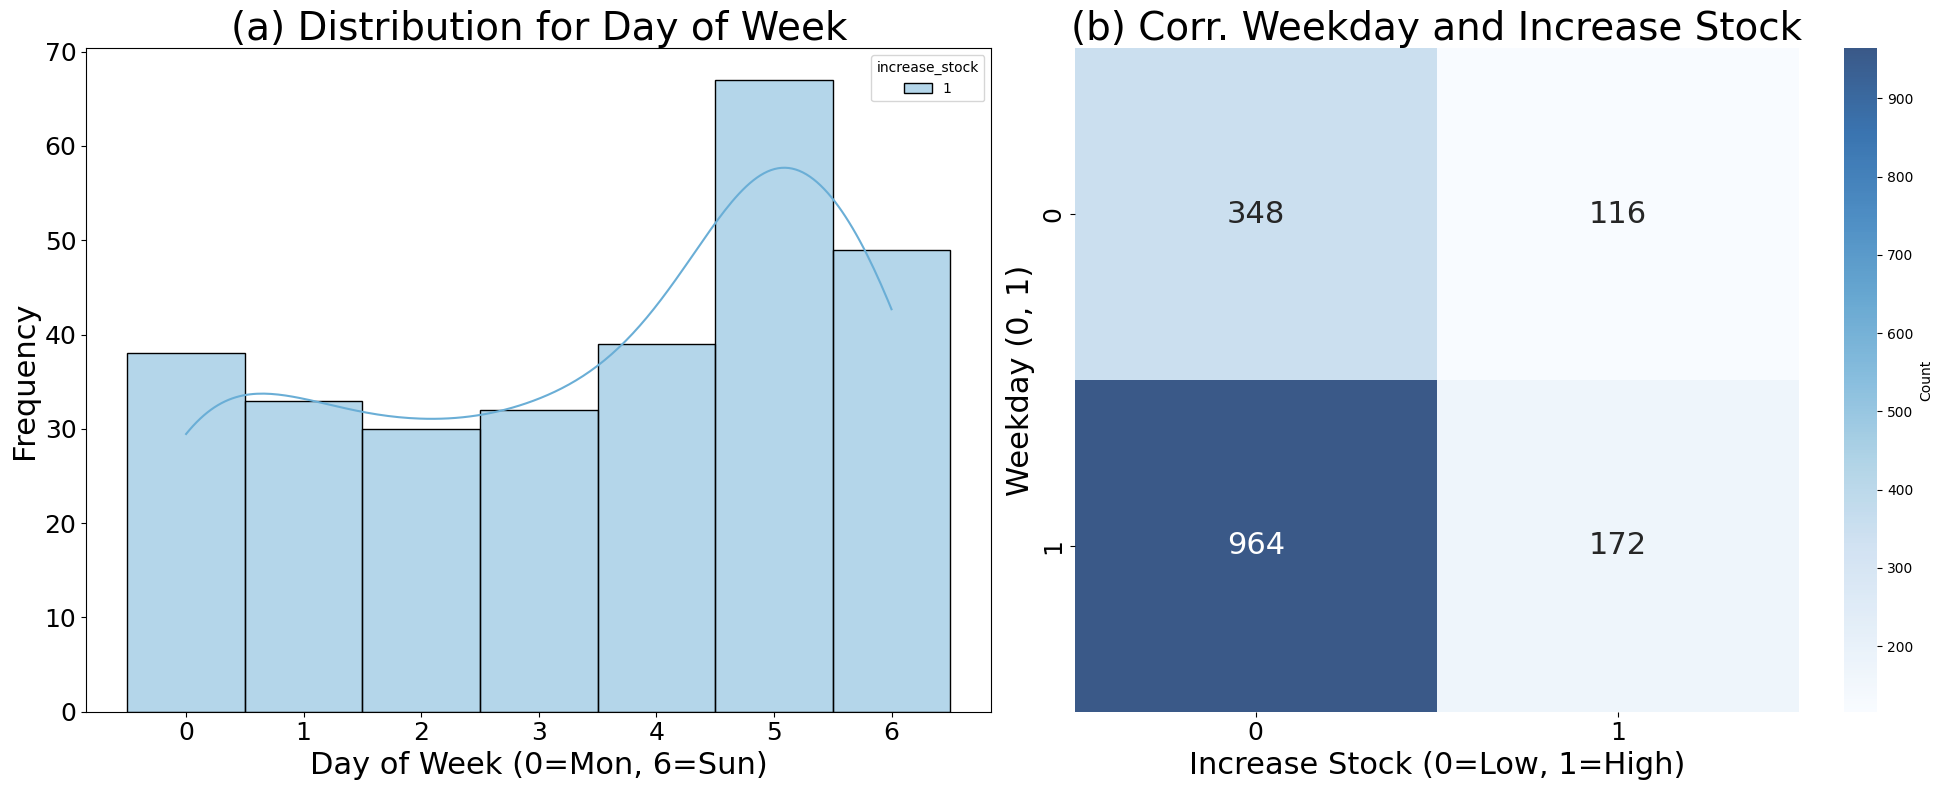

In [93]:
# Trend with week related features
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Day of Week vs High Stock Demand
sns.histplot(data=df_high, x='day_of_week', bins=7, palette='Blues', hue='increase_stock', discrete=True, kde=True, ax=axes[0])
axes[0].set_title('(a) Distribution for Day of Week', fontsize=TITLE_SIZE)
axes[0].set_xlabel('Day of Week (0=Mon, 6=Sun)', fontsize=LABEL_SIZE)
axes[0].set_ylabel('Frequency', fontsize=LABEL_SIZE)
axes[0].tick_params(axis='both', which='major', labelsize=TICK_SIZE)
axes[0].set_xticks(range(7))

# Correlation between 'weekday' and 'increase_stock'
ct = pd.crosstab(df['weekday'], df['increase_stock'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Blues', alpha=0.8, ax=axes[1], annot_kws={"size":LABEL_SIZE}, cbar_kws={'label': 'Count'})
axes[1].set_title('(b) Corr. Weekday and Increase Stock', fontsize=TITLE_SIZE)
axes[1].set_xlabel('Increase Stock (0=Low, 1=High)', fontsize=LABEL_SIZE)
axes[1].set_ylabel('Weekday (0, 1)', fontsize=LABEL_SIZE)
axes[1].tick_params(axis='both', which='major', labelsize=TICK_SIZE) 

plt.tight_layout()
plt.savefig('fig2.png', dpi=600)
plt.show()


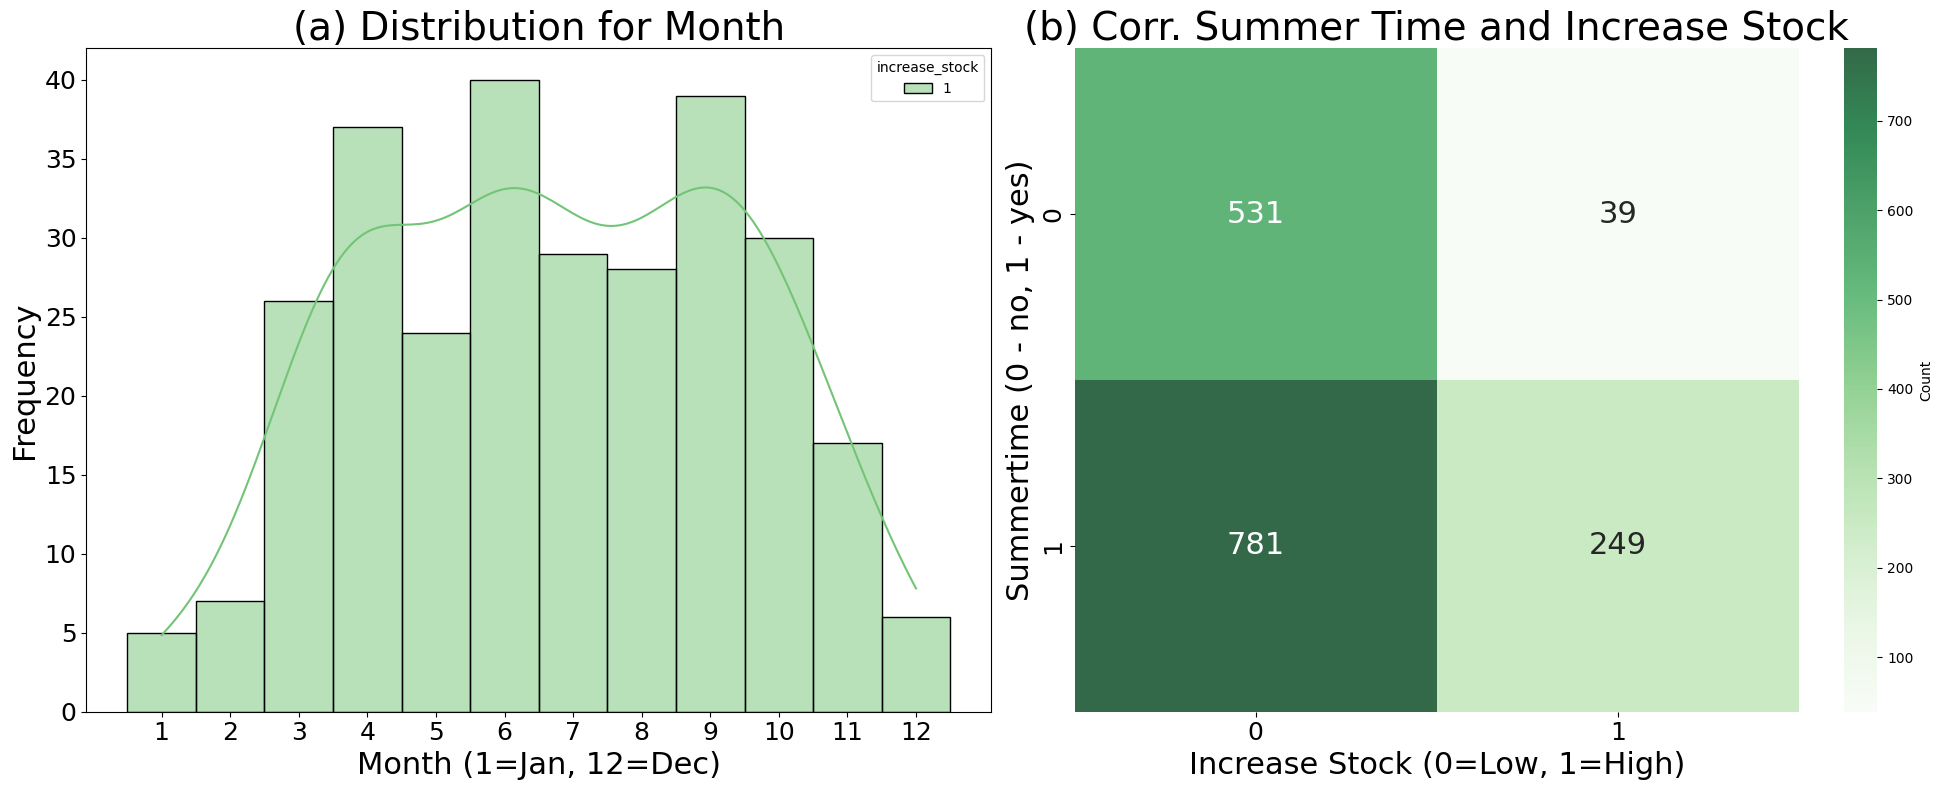

In [94]:
# Trend with month related features
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Month vs High Stock Demand
sns.histplot(data=df_high, x='month', bins=12, palette='Greens', hue='increase_stock', discrete=True, kde=True, ax=axes[0])
axes[0].set_title('(a) Distribution for Month', fontsize=TITLE_SIZE)
axes[0].set_xlabel('Month (1=Jan, 12=Dec)', fontsize=LABEL_SIZE)
axes[0].set_ylabel('Frequency', fontsize=LABEL_SIZE)
axes[0].tick_params(axis='both', which='major', labelsize=TICK_SIZE) # Increase tick label size
axes[0].set_xticks(range(1, 13))

# Correlation between 'summertime' and 'increase_stock'
ct = pd.crosstab(df['summertime'], df['increase_stock'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens', alpha=0.8, ax=axes[1], annot_kws={"size":LABEL_SIZE}, cbar_kws={'label': 'Count'})
axes[1].set_title('(b) Corr. Summer Time and Increase Stock', fontsize=TITLE_SIZE)
axes[1].set_xlabel('Increase Stock (0=Low, 1=High)', fontsize=LABEL_SIZE)
axes[1].set_ylabel('Summertime (0 - no, 1 - yes)', fontsize=LABEL_SIZE)
axes[1].tick_params(axis='both', which='major', labelsize=TICK_SIZE)

plt.tight_layout()
plt.savefig('fig3.png', dpi=600)
plt.show()



In [95]:
print(df['snow'].unique()) # Redundant

[0]


In [96]:
df = df.drop(['snow', 'hour_bin'], axis=1)

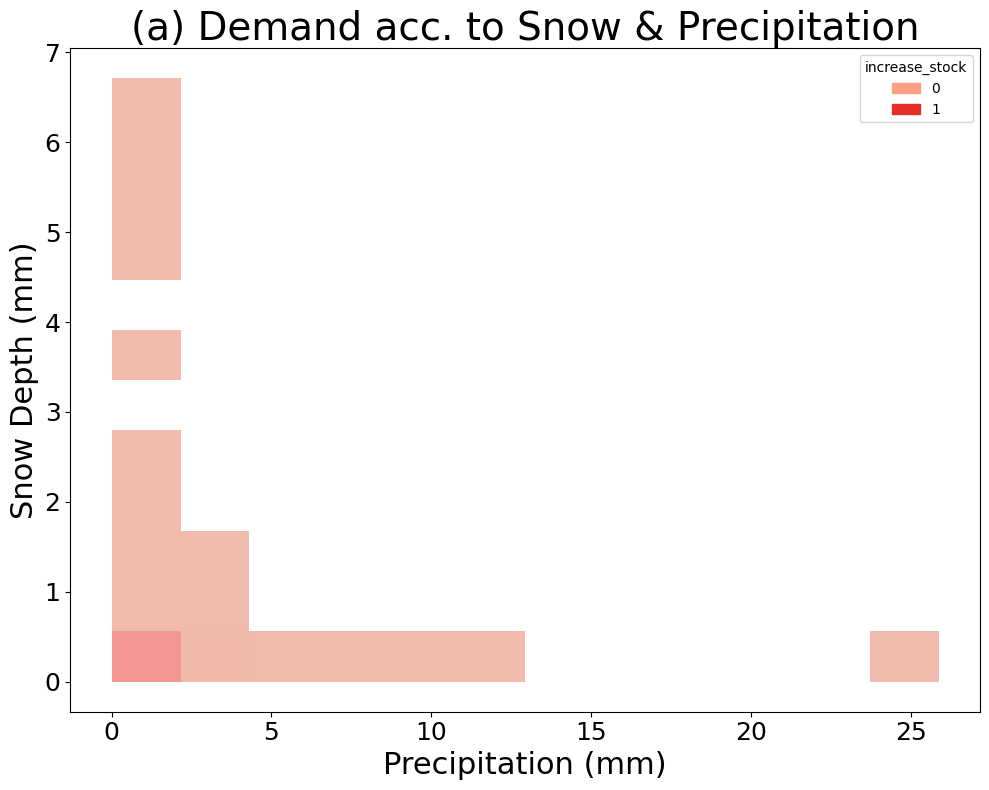

In [97]:
# Trends with rain and snow related features
plt.figure(figsize=(10, 8))

ax = plt.gca()

sns.histplot(df, x="precip", y="snowdepth", palette="Reds", hue="increase_stock", ax=ax)
ax.set_title('(a) Demand acc. to Snow & Precipitation', fontsize=TITLE_SIZE)
ax.set_xlabel('Precipitation (mm)', fontsize=LABEL_SIZE)
ax.set_ylabel('Snow Depth (mm)', fontsize=LABEL_SIZE)

ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)

plt.tight_layout()
plt.savefig('fig4.png', dpi=600)
plt.show()


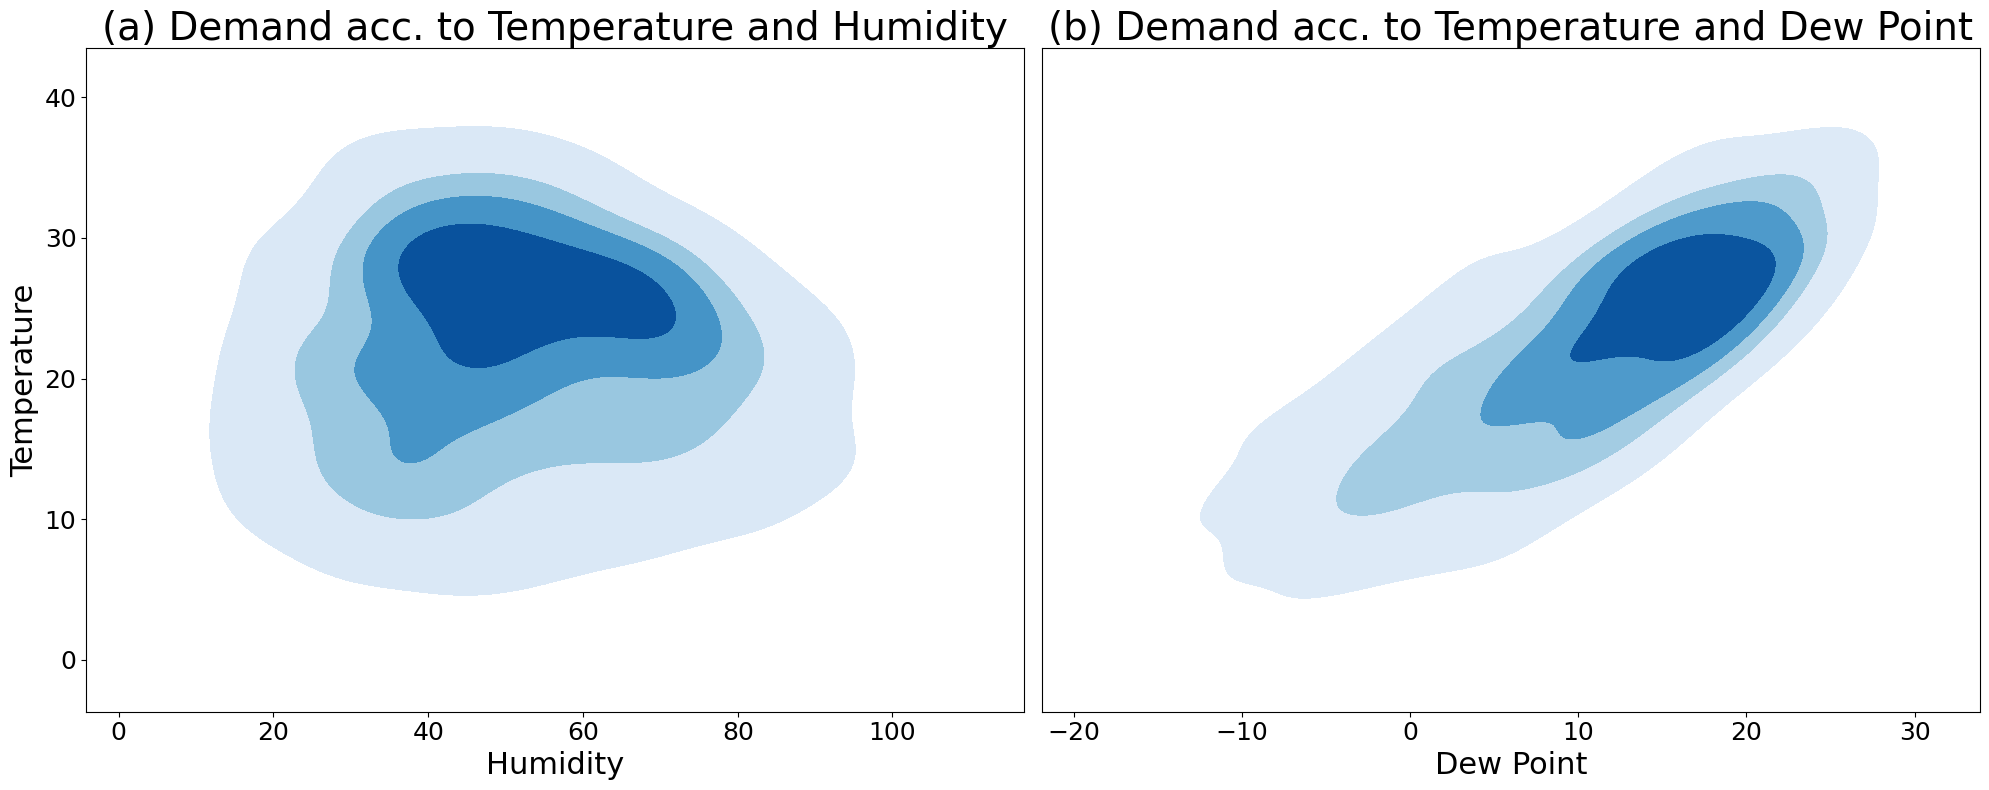

In [98]:
# Trend with atmospheric features
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.kdeplot(data=df_high, x='humidity', y='temp', cmap='Blues', levels=5, fill=True, ax=axes[0])
axes[0].set_title('(a) Demand acc. to Temperature and Humidity', fontsize=TITLE_SIZE)
axes[0].set_ylabel('Temperature', fontsize=LABEL_SIZE)
axes[0].set_xlabel('Humidity', fontsize=LABEL_SIZE)
axes[0].tick_params(axis='both', which='major', labelsize=TICK_SIZE)

sns.kdeplot(data=df_high, x='dew', y='temp', cmap='Blues', levels=5, fill=True, ax=axes[1])
axes[1].set_title('(b) Demand acc. to Temperature and Dew Point', fontsize=TITLE_SIZE)
axes[1].set_ylabel('', fontsize=LABEL_SIZE)
axes[1].set_yticks([])
axes[1].set_xlabel('Dew Point', fontsize=LABEL_SIZE)
axes[1].tick_params(axis='x', which='major', labelsize=TICK_SIZE)

plt.tight_layout()
plt.savefig('fig5.png', dpi=600)
plt.show()


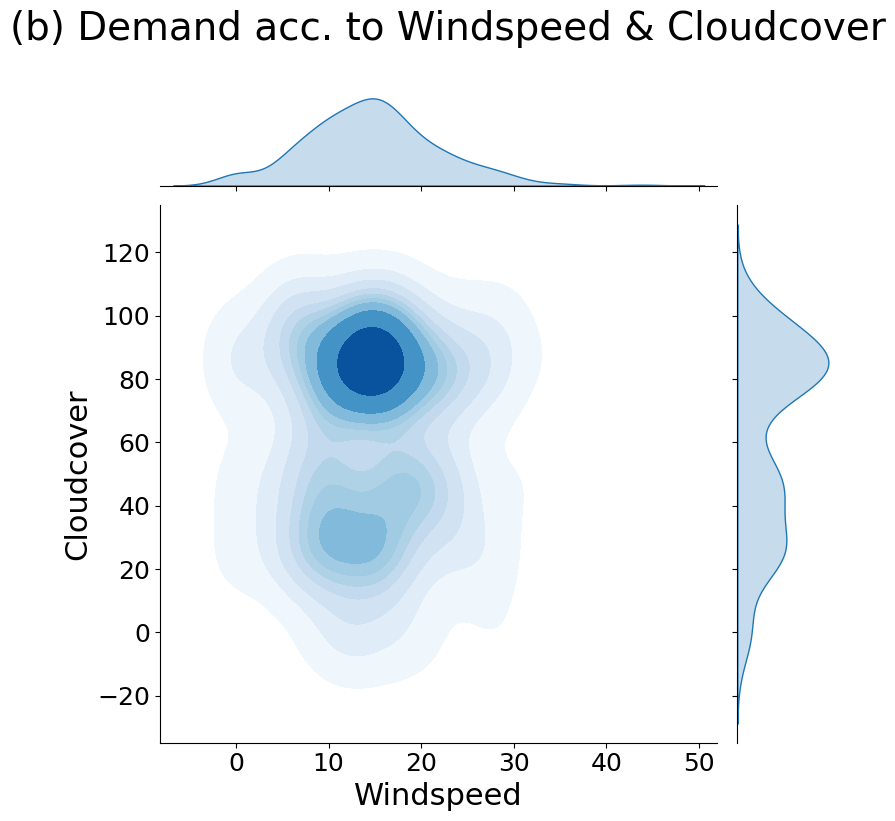

In [99]:
# Trends with wind and cloud related features
g = sns.jointplot(data=df_high, x="windspeed", y="cloudcover", kind="kde", cmap="Blues", fill=True, height=8, ratio=5)

g.fig.suptitle('(b) Demand acc. to Windspeed & Cloudcover', fontsize=TITLE_SIZE, y=1.02)

g.ax_joint.set_xlabel('Windspeed', fontsize=LABEL_SIZE)
g.ax_joint.set_ylabel('Cloudcover', fontsize=LABEL_SIZE)

g.ax_joint.tick_params(axis='both', which='major', labelsize=TICK_SIZE)
g.ax_marg_x.tick_params(axis='x', which='major', labelsize=TICK_SIZE)
g.ax_marg_y.tick_params(axis='y', which='major', labelsize=TICK_SIZE)

g.fig.tight_layout()
g.fig.savefig('fig6.png', dpi=600)
plt.show()


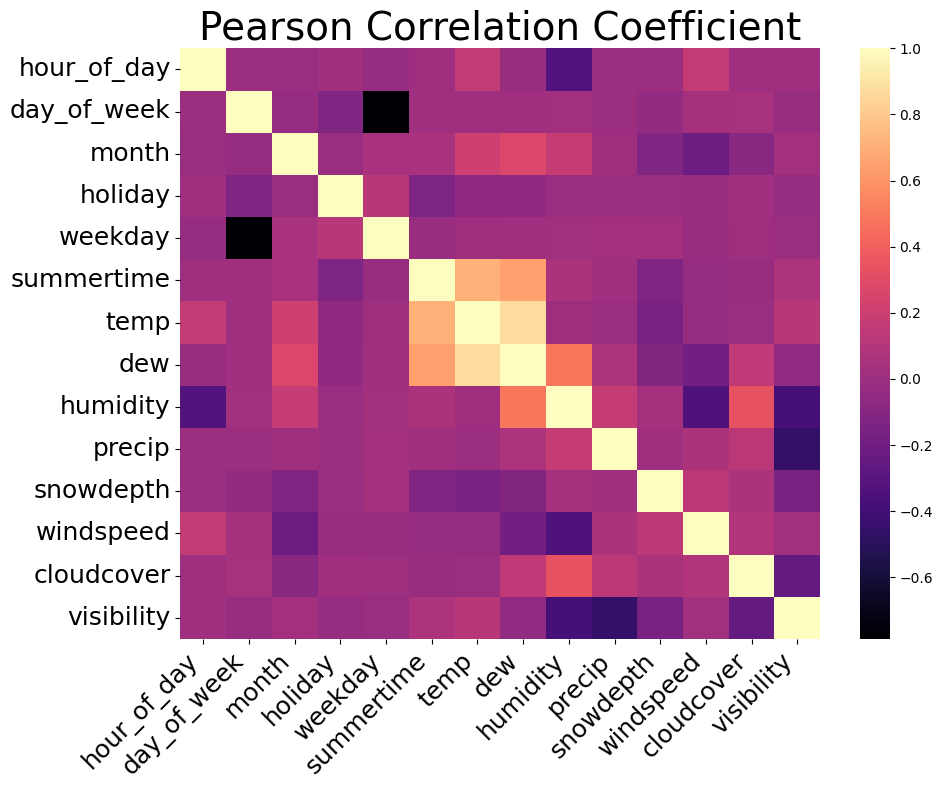

In [100]:
# Pearson Correlation Coefficient
x = df.iloc[:, :-1]

plt.figure(figsize=(10, 8))
ax = plt.gca()
sns.heatmap(x.corr(), cmap='magma', ax=ax)
ax.set_title('Pearson Correlation Coefficient', fontsize=TITLE_SIZE)
ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=TICK_SIZE)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=TICK_SIZE)
plt.tight_layout()
plt.savefig('fig7.png', dpi=600)
plt.show()

In [101]:
# Outlier Analysis

def cap_outliers_iqr(series):
    
    # Calculate IQR
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the data (Winsorization)
    return series.clip(lower=lower_bound, upper=upper_bound)


In [102]:
def plot_capped_boxplots(df, features):
    """FIGURE 1: Box plots for CAPPED features"""
    plt.figure(figsize=(15, 10))
    
    rows = 2
    cols = (len(features) // rows) + 1
    
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(col, fontweight='bold')
        plt.ylabel("Value")
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_capped_violins(df, features):
    """FIGURE 2: Violin plots for CAPPED features"""
    plt.figure(figsize=(15, 10))
    
    rows = 2
    cols = (len(features) // rows) + 1
    
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i + 1)
        sns.violinplot(y=df[col], color='lightgreen')
        plt.title(col, fontweight='bold')
        plt.ylabel("Value")
        
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

def plot_windspeed_comparison(df_original, df_capped):
    """FIGURE 3: Side-by-side comparison for Windspeed"""
    plt.figure(figsize=(12, 6))
    plt.suptitle("Figure 3: Windspeed Capping Effects", fontsize=16)
    
    # Original
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df_original['windspeed'], color='salmon')
    plt.title("Original Windspeed (With Outliers)", fontweight='bold')
    plt.ylim(bottom=0)
    
    # Capped
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_capped['windspeed'], color='lightgreen')
    plt.title("Capped Windspeed (Outliers Removed)", fontweight='bold')
    plt.ylim(bottom=0)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

Capping outliers...
Generating Figure 1 (Box Plots - Capped)...


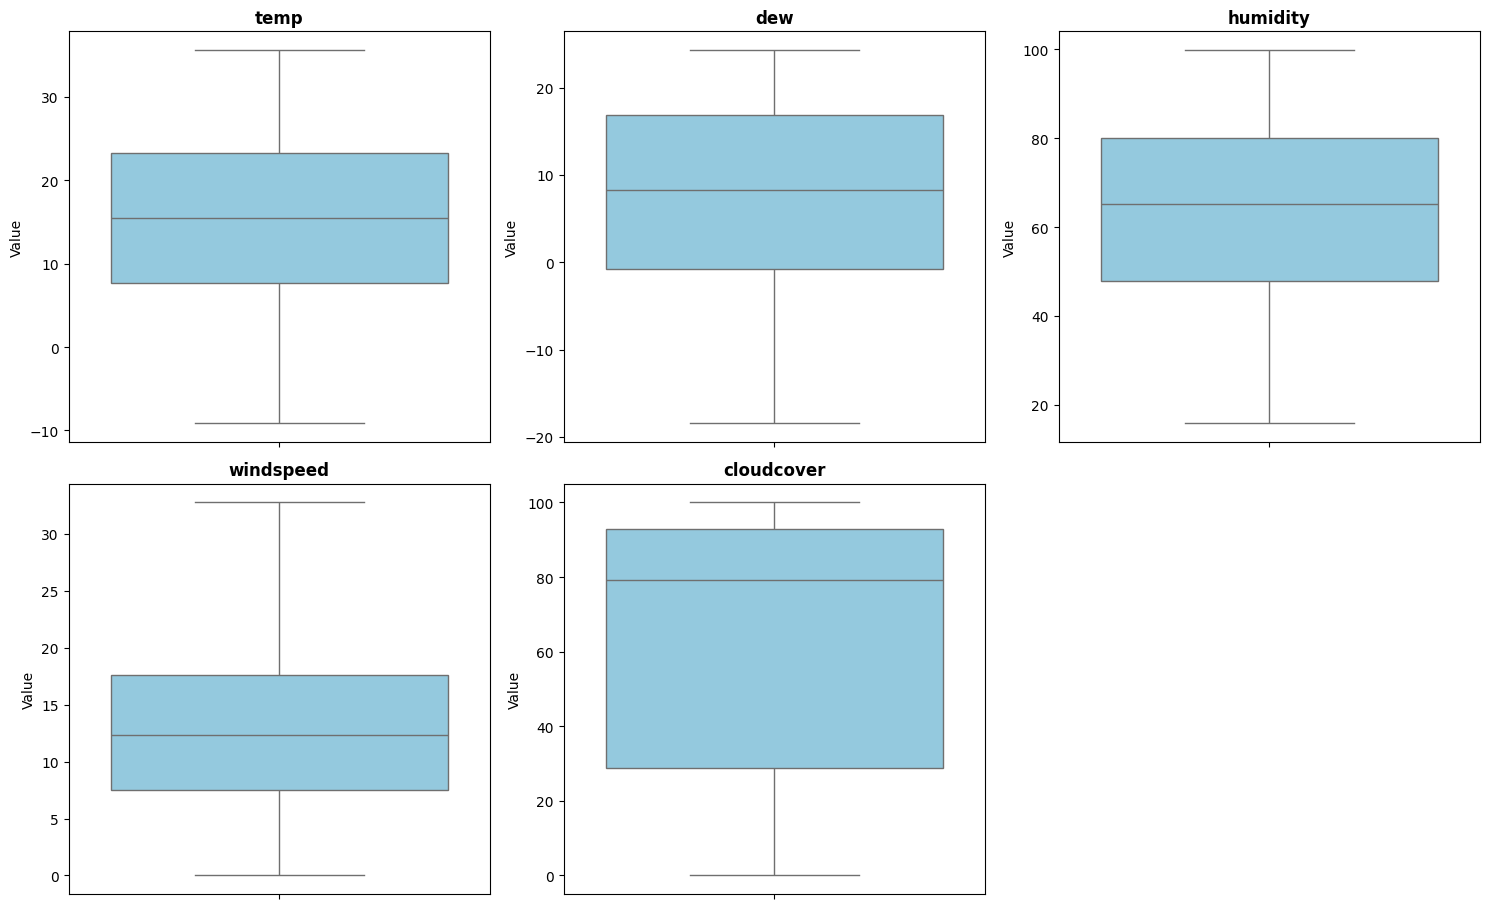

Generating Figure 2 (Violin Plots - Capped)...


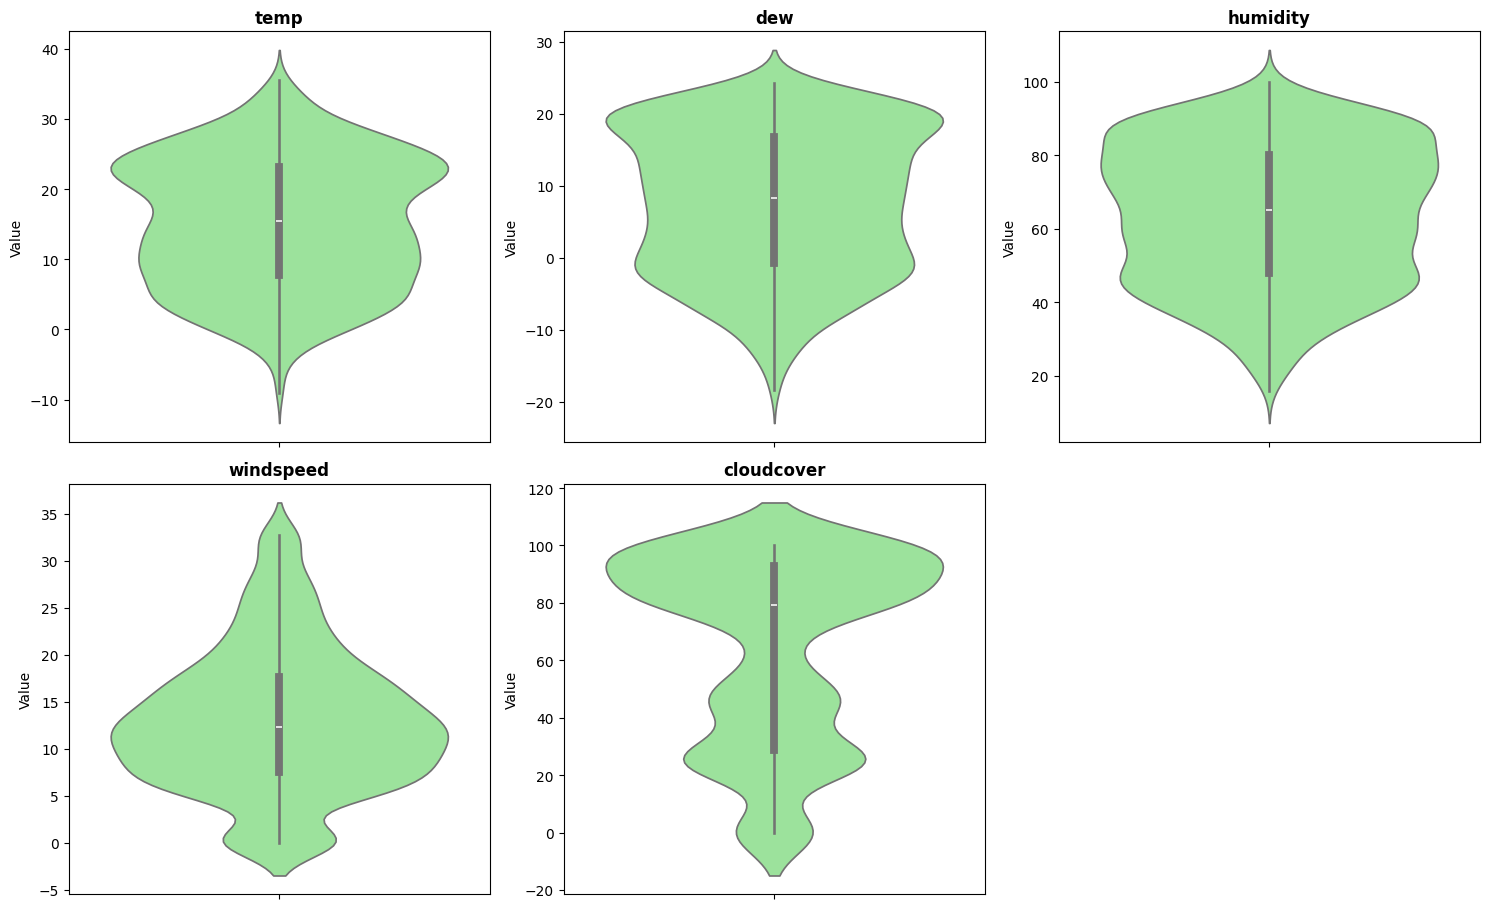

Generating Figure 3 (Windspeed Comparison)...


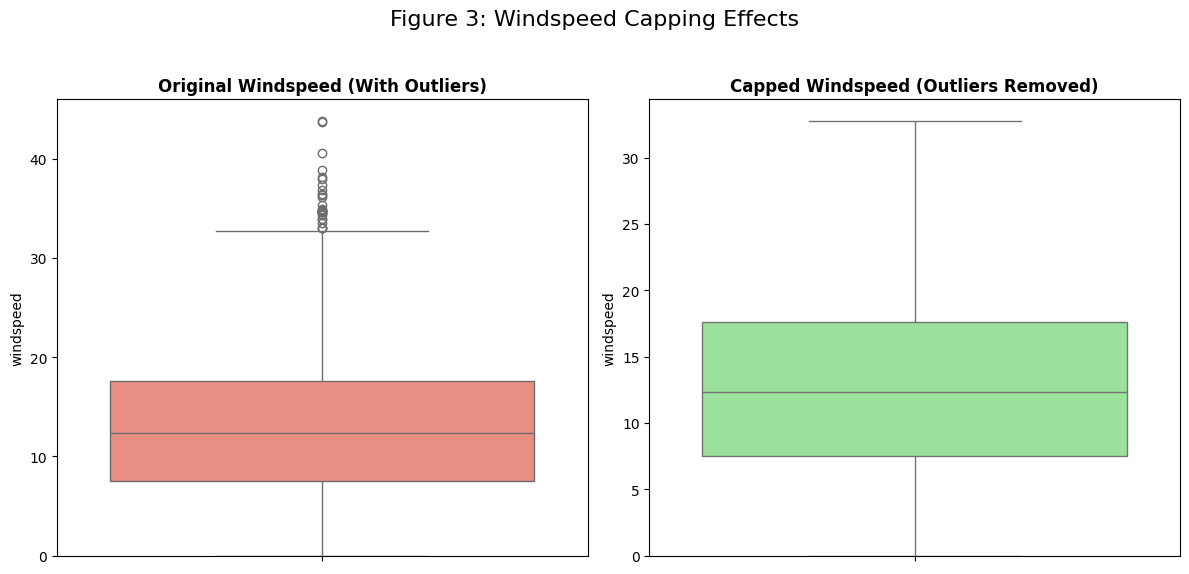

Could not save file: name 'OUTPUT_PATH' is not defined


In [103]:
if __name__ == "__main__":
    # 1. Load Data
    
    if df is not None:
        numerical_cols = ['temp', 'dew', 'humidity', 'windspeed', 'cloudcover']
        valid_cols = [c for c in numerical_cols if c in df.columns]

        # 2. Apply Capping FIRST
        print("Capping outliers...")
        df_capped = df.copy()
        for col in valid_cols:
            df_capped[col] = cap_outliers_iqr(df_capped[col])

        # 3. Generate Figures using CAPPED data
        print("Generating Figure 1 (Box Plots - Capped)...")
        plot_capped_boxplots(df_capped, valid_cols)

        print("Generating Figure 2 (Violin Plots - Capped)...")
        plot_capped_violins(df_capped, valid_cols)

        # 4. Generate Figure 3 (Comparison)
        if 'windspeed' in df.columns:
            print("Generating Figure 3 (Windspeed Comparison)...")
            plot_windspeed_comparison(df, df_capped)
        
        # 5. Save Data
        try:
            df_capped.to_excel(OUTPUT_PATH, index=False)
            print(f"Capped data saved to: {OUTPUT_PATH}")
        except Exception as e:
            print(f"Could not save file: {e}")

In [104]:
df_capped

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0.0,16.3,31.6,16.0,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0.0,23.9,85.7,16.0,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0.0,0.0,81.1,16.0,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0.0,19.2,0.0,16.0,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0.0,10.5,44.6,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0.0,10.6,24.4,16.0,0
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0.0,9.8,92.1,10.4,0
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,2.0,18.2,79.3,16.0,0
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0.0,5.8,24.4,16.0,1


In [105]:
# Data preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_capped.iloc[:, :-1]
y = df_capped.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
# Model Building
from collections import Counter

class KNNClassifier:
    def __init__(self, k=3):
        """
        Initialize the model with hyperparameter k.
        """
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Store the training data.
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        
    def predict(self, X):
        """
        Predict labels for the given test data X.
        """
        X_test = np.array(X)
        predictions = [self._predict_single_point(x) for x in X_test]
        return np.array(predictions)

    def _predict_single_point(self, x):
        """
        Helper method: Predict the label for a SINGLE test point.
        """
        # Calculate distances between x and all examples in the training set
        distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
        
        # Get indices of the k nearest neighbors (smallest distances)
        k_indices = np.argsort(distances)[:self.k]
        
        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [107]:
# Model Prediction
model = KNNClassifier(k=3)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

--- Model Accuracy ---
0.8500

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       262
           1       0.60      0.50      0.55        58

    accuracy                           0.85       320
   macro avg       0.75      0.71      0.73       320
weighted avg       0.84      0.85      0.84       320



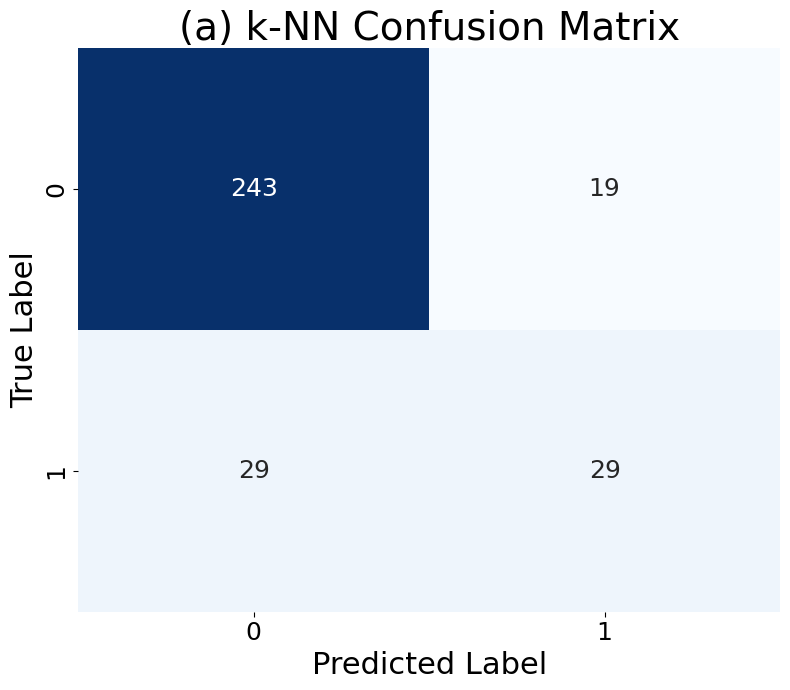

In [108]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("--- Model Accuracy ---")
print(f"{accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 7. Visualizing the Confusion Matrix
plt.figure(figsize=(8, 7))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": TICK_SIZE})

ax.set_xlabel('Predicted Label', fontsize=LABEL_SIZE)
ax.set_ylabel('True Label', fontsize=LABEL_SIZE)
ax.set_title('(a) k-NN Confusion Matrix', fontsize=TITLE_SIZE)
ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)

plt.tight_layout()
plt.savefig('fig8.png', dpi=600)
plt.show()

In [109]:
from collections import defaultdict

class WeightedKNNClassifier:
    def __init__(self, k):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def predict(self, X):
        X_test = np.array(X)
        return np.array([self._predict_single_point(x) for x in X_test])

    def _predict_single_point(self, x):
        # Calculate distances (Same as before)
        distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
        
        # Get indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        
        # Get labels and distances of those neighbors
        k_nearest_labels = self.y_train[k_indices]
        k_nearest_dists = distances[k_indices]
        
        # --- NEW LOGIC: WEIGHTED VOTING ---
        vote_scores = defaultdict(float)
        
        for label, dist in zip(k_nearest_labels, k_nearest_dists):
            # If distance is 0, this point matches exactly. 
            # It should get infinite weight (win immediately).
            if dist == 0:
                return label
            
            # Inverse distance weight
            weight = 1 / dist
            vote_scores[label] += weight
            
        # Return the label with the highest total weight
        return max(vote_scores, key=vote_scores.get)

In [110]:
# Model Prediction
model = WeightedKNNClassifier(k=40)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

--- Model Accuracy ---
0.8750

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       262
           1       0.82      0.40      0.53        58

    accuracy                           0.88       320
   macro avg       0.85      0.69      0.73       320
weighted avg       0.87      0.88      0.86       320



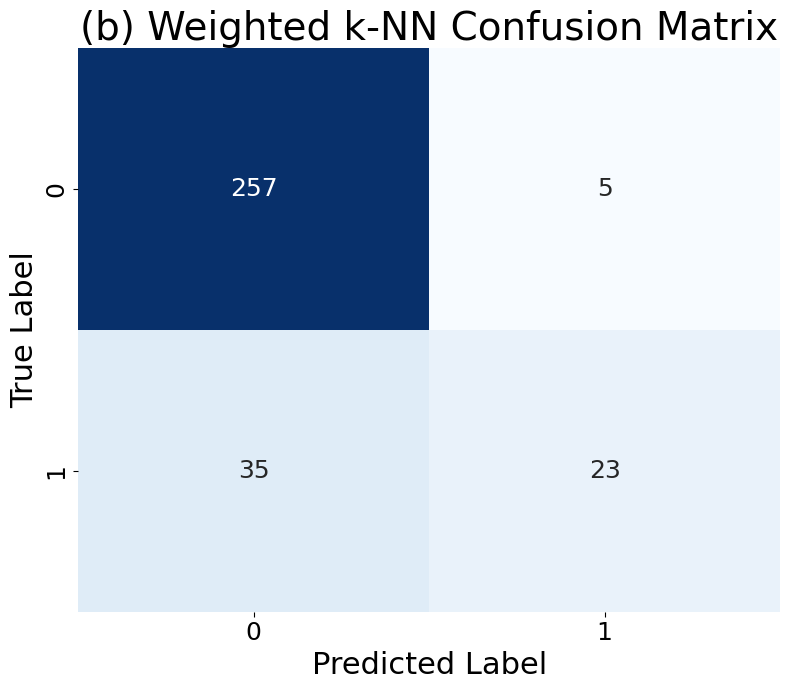

In [111]:
# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("--- Model Accuracy ---")
print(f"{accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 7. Visualizing the Confusion Matrix
plt.figure(figsize=(8, 7))
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"fontsize": TICK_SIZE})

ax.set_xlabel('Predicted Label', fontsize=LABEL_SIZE)
ax.set_ylabel('True Label', fontsize=LABEL_SIZE)
ax.set_title('(b) Weighted k-NN Confusion Matrix', fontsize=TITLE_SIZE)
ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)

plt.tight_layout()
plt.savefig('fig9.png', dpi=600)
plt.show()